<a href="https://colab.research.google.com/github/VamBay/DS4BME_YUANWEI_XU/blob/master/Class_Project_3_Yuanwei_Xu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3

1. Do a scatterplot of the left telencephalon **(type 1 level 1) volume** by the right. The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv) 
2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot. 
3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
4. Let $X_i$ be a group indicator so that 
$$
x_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 
5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.
6. Consider the Kirby 21 data. Plot a scatter plot of the left diencephalon (type 1 level 1) and the right. Find the best line fit for predicting the right using the left. Plot the line on the scatterplot. Find the best fit line for predicting the left using the right as a predictor. Plot this on the same plot.
7. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. 


In [27]:
## Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

## Import Files
## this sets some style parameters
sns.set()

## Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")

1. Do a scatterplot of the left telencephalon **(type 1 level 1) volume** by the right.

In [28]:
## Read Data in Pandas
df = pd.read_csv("kirby21.csv")
df = df.drop(['Unnamed: 0', 'rawid'],\
               axis = 1)
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
t1l1.head(20)
t1l1.set_index("id", inplace = True)
t1l1.head(20)


,roi,volume,min,max,mean,std,type,level,icv,tbv
id,,,,,,,,,,
127,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,1378295,1268519
127,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,1378295,1268519
127,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,1378295,1268519
127,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,1378295,1268519
127,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,1378295,1268519
127,Metencephalon,159402,2.0,299.0,138.5200,52.2241,1,1,1378295,1268519
127,Myelencephalon,4973,12.0,286.0,199.8497,36.6501,1,1,1378295,1268519
127,CSF,109776,0.0,258.0,33.0193,26.3262,1,1,1378295,1268519
142,Telencephalon_L,545603,1.0,378.0,148.7835,56.9909,1,1,1404611,1297277


In [29]:
tele_L_df = t1l1.loc[(t1l1.roi == "Telencephalon_L")]
tele_R_df = t1l1.loc[(t1l1.roi == "Telencephalon_R")]
tele_V_df = pd.DataFrame({'Telencephalon L Volume': tele_L_df.volume,
                   'Telencephalon R Volume': tele_R_df.volume,})
tele_V_df.head()

,Telencephalon L Volume,Telencephalon R Volume
id,,
127,531111,543404
142,545603,552216
239,483107,490805
346,558849,568830
422,509945,518902


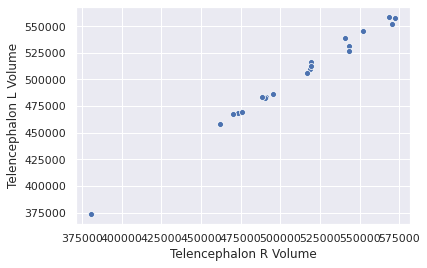

In [30]:
## Plot the data
sns.scatterplot('Telencephalon R Volume', 'Telencephalon L Volume', data = tele_V_df)

2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot.

[-1133.0767547559212, 0.9479275429561125]
LinregressResult(slope=0.9479275429561126, intercept=-1133.0767547559221, rvalue=0.9973190677367187, pvalue=1.0857710389227179e-12, stderr=0.021994174406685177)


Text(0, 0.5, 'Demean Left Telencephalon Volume')

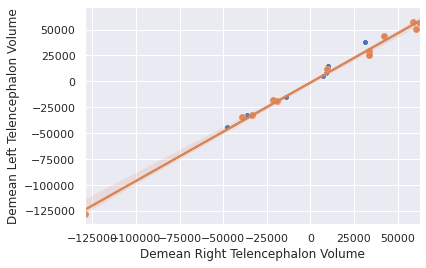

In [94]:
## Vectorize
v_tele_L = tele_V_df['Telencephalon L Volume'].to_numpy()
v_tele_R = tele_V_df['Telencephalon R Volume'].to_numpy()
## Demean
Lmean = np.mean(v_tele_L)
Rmean = np.mean(v_tele_R)
demean_tele_L = np.array([i-Lmean for i in v_tele_L])
demean_tele_R = np.array([j-Rmean for j in v_tele_R])
## Scatterplot
sns.scatterplot(demean_tele_R, demean_tele_L)
### Linear Regression fit-Right as predictor ###
x1 = demean_tele_R
y1 = demean_tele_L
trainFraction = 0.75

## Hold out data
sample = np.random.uniform(size = 20) < trainFraction
x1train = x1[ sample]
y1train = y1[ sample]
x1test =  x1[~sample]
y1test =  y1[~sample]

## get the slope on the training data
beta1_1 = st.pearsonr(x1train, y1train)[0] * np.std(y1train) / np.std(x1train)
beta0_1 = np.mean(y1train) - np.mean(x1train) * beta1_1
print([beta0_1, beta1_1])

sns.scatterplot(x1train, y1train)

## add a line
sns.lineplot(x1train, beta0_1 + beta1_1 * x1train)

print(st.linregress(x = x1train, y = y1train))
sns.regplot(x1train, y1train)
plt.xlabel('Demean Right Telencephalon Volume')
plt.ylabel('Demean Left Telencephalon Volume')

[14182103.508092145, 18730513.78913381]


Text(0, 0.5, 'Actual left telencephalon volume from y1test')

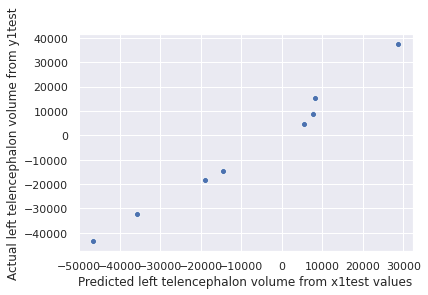

In [97]:
y1hat_test = beta0_1 + beta1_1 * x1test
y1hat_train = beta0_1 + beta1_1 * x1train

## claculate the MSE in the training and test sets
print([ np.mean( (y1train - y1hat_train) ** 2), 
        np.mean( (y1test -  y1hat_test) ** 2 ) ])


sns.scatterplot(y1hat_test, y1test)
plt.xlabel('Predicted left telencephalon volume from x1test values')
plt.ylabel('Actual left telencephalon volume from y1test')

[-4.68781387720901, 1.0952289136771778]
LinregressResult(slope=1.0952289136771776, intercept=-4.6878138772081, rvalue=0.9955695398070386, pvalue=8.880222420684351e-16, stderr=0.02764567095556089)


Text(0, 0.5, 'Demean Right Telencephalon Volume')

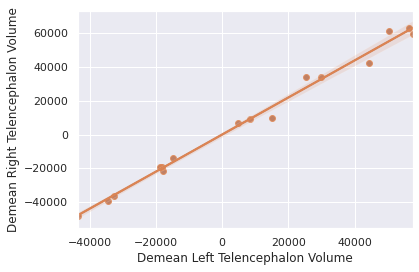

In [99]:
### Linear Regression fit-Left as predictor ###
x2 = demean_tele_L
y2 = demean_tele_R
trainFraction = 0.75

## Hold out data
sample = np.random.uniform(size = 20) < trainFraction
x2train = x2[ sample]
y2train = y2[ sample]
x2test =  x2[~sample]
y2test =  y2[~sample]

## get the slope on the training data
beta1_2 = st.pearsonr(x2train, y2train)[0] * np.std(y2train) / np.std(x2train)
beta0_2 = np.mean(y2train) - np.mean(x2train) * beta1_2
print([beta0_2, beta1_2])

sns.scatterplot(x2train, y2train)

## add a line
sns.lineplot(x2train, beta0_2 + beta1_2 * x2train)

print(st.linregress(x = x2train, y = y2train))
sns.regplot(x2train, y2train)
plt.xlabel('Demean Left Telencephalon Volume')
plt.ylabel('Demean Right Telencephalon Volume')

[11623657.666065697, 58499566.36655628]


Text(0, 0.5, 'Actual right telencephalon volume from y2test')

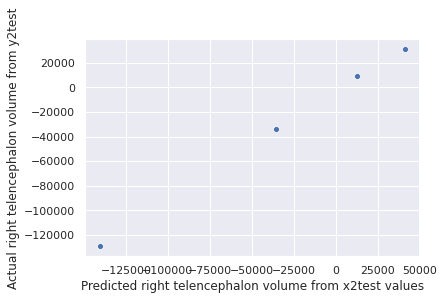

In [101]:
y2hat_test = beta0_2 + beta1_2 * x2test
y2hat_train = beta0_2 + beta1_2 * x2train

## claculate the MSE in the training and test sets
print([ np.mean( (y2train - y2hat_train) ** 2), 
        np.mean( (y2test -  y2hat_test) ** 2 ) ])


sns.scatterplot(y2hat_test, y2test)
plt.xlabel('Predicted right telencephalon volume from x2test values')
plt.ylabel('Actual right telencephalon volume from y2test')

3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?

**Answer** $\hat{B'} = \hat{B} /c$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


Original intercept estimator is [0.95005521]
After X transformation, the incerpect estimator becomes [0.31668507]
The intercept estimator after transformation is the [0.33333333] of the original intercept estimator


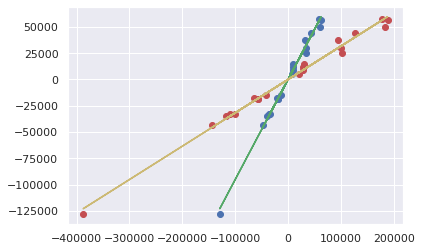

In [58]:
### Linear Regression through the origin fit-Right as predictor ###
x3 = demean_tele_R
## Constant c = 3
x3_3 = demean_tele_R*3
y3 = demean_tele_L

x3 = x3[:,np.newaxis]
x3_3 = x3_3[:,np.newaxis]
B, _, _, _ = np.linalg.lstsq(x3, y3)
B_3, _, _, _ = np.linalg.lstsq(x3_3, y3)
print("Original intercept estimator is", B)
print("After X transformation, the incerpect estimator becomes", B_3)
print("The intercept estimator after transformation is the", B_3/B, "of the original intercept estimator")
## Original fit shown in green
plt.plot(x3, y3, 'bo')
plt.plot(x3, B*x3, 'g-')
## Transformed fit shown in yellow
plt.plot(x3_3, y3, 'ro')
plt.plot(x3_3, B_3*x3_3, 'y-')
plt.show()

4. Let $X_i$ be a group indicator so that 
$$
x_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 

**Hint**
Consider a $y$ vector and an $x$ vector that is a colleciton of $1$s and $0$s (corresponding to group 1 and group 0, respectively).

Let $n_1$, $n_0$  be the number in group 1, 0 and $n=n_1 + n_0$.  Let $p_1$ be the fraction of observations in group 1, i.e. $n_1 / n$ and $p_0 = n_0 / n$ be the fraction of observations in group 0. Let $\bar y_1$ and $\bar y_0$ be the means of $y$ in each group and $\bar y$ be the overall mean of the $y$. 

The following are pretty easy to show:
* $\bar x = p_1$
* $\bar y = p_1 \bar y_1 + p_0 \bar y_0$
* $\sum_{i=1}^n (x_i - p_1)^2 = n_1 p_0^2 + n_0 p_1 ^2 = n p_1 p_0 $

We want to show that $\hat \beta_0 = \bar y_0$ and $\hat \beta_0 + \hat \beta_1 = \bar y_1$.
However, we know that $\hat \beta_0 = \bar y - \hat \beta_1 \bar x $. So, it must be the case that $\bar y_0 = \bar y - \hat \beta_1 \bar x$. Plugging in our existing results, we get that
$$
\hat \beta_1 = \bar y_1 - \bar y_0.
$$
It's easy to then check that if this is $\hat \beta_1$ then the problem is solved.  So, if we can show that, we're done.

Let $G_1$ and $G_0$ be the indices for groups 1 and 0. Consider:
$$
\begin{align}
\hat \beta_1 & = \frac{\sum_{i=1}^n (y_i - \bar y) (x_i - p_1)}{\sum_{i=1}^n (x_i - p_1)^2}\\
& = \frac{\sum_{i\in G_1}^n (y_i - \bar y) (x_i - p_1) + \sum_{i\in G_0}^n (y_i - \bar y) (x_i - p_1)}{n p_1 p_0} \\
& = \frac{(1 - p_1)\sum_{i\in G_1}^n (y_i - \bar y)  +  (0 - p_1)\sum_{i\in G_0}^n (y_i - \bar y)}{n p_1 p_0} \\
& = \frac{n_1(1 - p_1)(\bar y_1 - \bar y)  +  n_0(0 - p_1)(\bar y_0 - \bar y)}{n p_1 p_0} \\
& = \frac{n_1p_0(\bar y_1 - \bar y)-n_0p_1(\bar y_0 - \bar y)}{n p_1 p_0} \\
& = \frac{n_1 \bar y_1 p_0 - n_1\bar y p_0 - n_0 \bar y_0 p_1 + n_0 \bar y p_1}{n p_1 p_0} \\
& = \frac{n_1 \bar y_1 p_0 - n_1\bar y p_0 - n_0 \bar y_0 p_1 + n_0 \bar y p_1}{n p_1 p_0} \\
& = \bar y_1 - \bar y - \bar y_0 + \bar y \\
& = \bar y_1 - \bar y_0 
\end{align}
$$

Then we could show that 
$$
\begin{align}
\hat \beta_0 & = \bar y - \hat \beta_1 \bar x\\
& = \bar y -(\bar y_1 -\bar y_0)\bar x\\
& = p_1\bar y_1+p_0\bar y_0-p_1\bar y_1+p_1\bar y_0\\
& = \bar y_0(p_1+p_0)\\
& = \bar y_0\\
\end{align}
$$
Thus
$$
\begin{align}
\hat \beta_0 +\hat \beta_1=\bar y_1\\
\end{align}
$$


5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.

In [ ]:
## Obtain X and Y values
X = data['X column'].values
Y = data['Y column'].values

## Mean of X and Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)
 
## Total number of values
n = len(X)
## Calculate covariance between X and Y
def covariance(X, X_mean, Y, Y_mean):
	covar = 0.0
	for i in range(n):
		covar += (X[i] - X_mean) * (Y[i] - Y_mean)
	return covar

## Calculate the variance of X
def variance(values, mean):
	return sum([(x-mean)**2 for x in values]) 
 
## Using the formula to calculate beta0 and beta1 estimators
b1 = covariance(X, X_mean, Y, Y_mean) / variance(X, X_mean)
b0 = Y_mean - b1 * X_mean
print(b1, b0)

6. Consider the Kirby 21 data. Plot a scatter plot of the left diencephalon (type 1 level 1) and the right. Find the best line fit for predicting the right using the left. Plot the line on the scatterplot. Find the best fit line for predicting the left using the right as a predictor. Plot this on the same plot.

In [60]:
dien_L_df = t1l1.loc[(t1l1.roi == "Diencephalon_L")]
dien_R_df = t1l1.loc[(t1l1.roi == "Diencephalon_R")]
dien_V_df = pd.DataFrame({'Diencephalon L Volume': tele_L_df.volume,
                   'Diencephalon R Volume': tele_R_df.volume,})
dien_V_df.head()

,Diencephalon L Volume,Diencephalon R Volume
id,,
127,531111,543404
142,545603,552216
239,483107,490805
346,558849,568830
422,509945,518902


[9168.672009651258, 0.967038507972616]
[-5612.691449113248, 1.0262108799550687]
LinregressResult(slope=0.9670385079726158, intercept=9168.672009651375, rvalue=0.9961854436885809, pvalue=5.270328395246386e-13, stderr=0.025540517435989632)
LinregressResult(slope=1.0262108799550687, intercept=-5612.691449113248, rvalue=0.9961854436885809, pvalue=5.270328395246386e-13, stderr=0.02710332283193515)


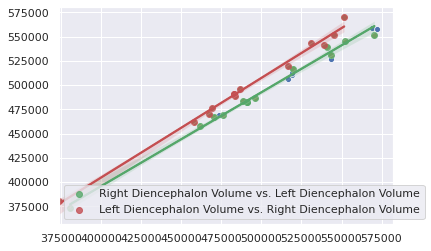

In [92]:
## Vectorize
v_dien_L = dien_V_df['Diencephalon L Volume'].to_numpy()
v_dien_R = dien_V_df['Diencephalon R Volume'].to_numpy()

## Scatterplot
sns.scatterplot(v_dien_R, v_dien_L)

### Linear Regression fit-Right as predictor ###
x1 = v_dien_R
y1 = v_dien_L

### Linear Regression fit-Right as predictor ###
x2 = v_dien_L
y2 = v_dien_R
trainFraction = 0.75

## Hold out data
sample = np.random.uniform(size = 20) < trainFraction
x1train = x1[ sample]
y1train = y1[ sample]
x1test =  x1[~sample]
y1test =  y1[~sample]

x2train = x2[ sample]
y2train = y2[ sample]
x2test =  x2[~sample]
y2test =  y2[~sample]

## get the slope on the training data
beta1_1 = st.pearsonr(x1train, y1train)[0] * np.std(y1train) / np.std(x1train)
beta0_1 = np.mean(y1train) - np.mean(x1train) * beta1_1
print([beta0_1, beta1_1])

beta1_2 = st.pearsonr(x2train, y2train)[0] * np.std(y2train) / np.std(x2train)
beta0_2 = np.mean(y2train) - np.mean(x2train) * beta1_2
print([beta0_2, beta1_2])

sns.scatterplot(x1train, y1train)
sns.scatterplot(x2train, y2train)

## add a line 
sns.lineplot(x1train, beta0_1 + beta1_1 * x1train)
sns.lineplot(x2train, beta0_2 + beta1_2 * x2train)

print(st.linregress(x = x1train, y = y1train))
print(st.linregress(x = x2train, y = y2train))

a = "Right Diencephalon Volume vs. Left Diencephalon Volume", "Left Diencephalon Volume vs. Right Diencephalon Volume"
sns.regplot(x1train, y1train, label=a[0])
sns.regplot(x2train, y2train, label=a[1])
plt.legend()

7. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. 


**Proof**

We have slope $\beta_1$ estimator $\hat \beta_1$ for **regressing $Y$ on $X$**

$$
\begin{align}
\hat \beta_1 & = \frac{\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}\\
\end{align}
$$

and correlation $r(X,Y)$ between $X$ and $Y$ 

$$
\begin{align}
r(X,Y) & = \frac{\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{\sqrt{\sum_{i=1}^n (x_i - \bar x)^2}\sqrt{\sum_{i=1}^n (y_i - \bar y)^2}}=r\\
\end{align}
$$

and standard deviations $\sigma_x$ and $\sigma_y$ for $X$ and $Y$ respectively

$$
\begin{align}
\sigma_x & = \sqrt\frac{\sum_{i=1}^n (x_i - \bar x)^2}{n}\\
\end{align}
$$

$$
\begin{align}
\sigma_y & = \sqrt\frac{\sum_{i=1}^n (y_i - \bar y)^2}{n}\\
\end{align}
$$

We can therefore show that

$$
\begin{align}
\hat \beta_1  & = r\frac{\sigma_y}{\sigma_x}\\
\end{align}
$$

If we take the vectors  𝑌  and  𝑋  and divide them by their standard deviations respectively

$$
\begin{align}
r'(X,Y) & = \frac{\sum_{i=1}^n (x_i/\sigma_x - \bar x/\sigma_x) (y_i/\sigma_y - \bar y/\sigma_y)}{\sqrt{\sum_{i=1}^n (x_i/\sigma_x - \bar x/\sigma_x)^2}\sqrt{\sum_{i=1}^n (y_i/\sigma_y - \bar y/\sigma_y)^2}}\\
& = r(X,Y)
\end{align}
$$

and standard deviations $\sigma_x'$ and $\sigma_y'$ for $X/\sigma_x$ and $Y/\sigma_y$ respectively

$$
\begin{align}
\sigma_x' & = \sqrt\frac{\sum_{i=1}^n (x_i/\sigma_x - \bar x/\sigma_x)^2}{n}\\
& = \frac{1}{\sigma_x}\sqrt\frac{\sum_{i=1}^n (x_i - \bar x)^2}{n}\\
& = 1
\end{align}
$$
similarly, we could show that
$$
\begin{align}
\sigma_y' & = \sqrt\frac{\sum_{i=1}^n (y_i/\sigma_y - \bar y/\sigma_y)^2}{n}\\
& = 1
\end{align}
$$

$$
\begin{align}
\hat \beta_1'  & = r'\frac{\sigma_y'}{\sigma_x'}\\
& = r
\end{align}
$$

while **regressing $X$ on $Y$**
We have slope estimator $\alpha_1$ estimator $\hat \alpha_1$instead
$$
\begin{align}
\hat \alpha_1 & = \frac{\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{\sum_{i=1}^n (y_i - \bar y)^2}\\
\end{align}
$$

and correlation $r(Y,X)$ between $Y$ and $X$ 

$$
\begin{align}
r(X,Y) & = r(X,Y)=r\\
\end{align}
$$

similarly,
$$
\begin{align}
\hat \alpha_1  & = r\frac{\sigma_x'}{\sigma_y'}\\
\end{align}
$$
$$
\begin{align}
\hat \alpha_1'  & = r'\frac{\sigma_x}{\sigma_y}\\
& = r
\end{align}
$$

**Thus the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation $r$ when take the vectors $Y$ and $X$ and divide them by their standard deviations respectively.**